# Assignment-2: Image Compression Using Principal Component Analysis.

Herald College, University of Wolverhampton

Siman Giri and 5CS037-Team

27 Dec 2022

1 Assignment Details
Due Marks Submission
Jan-3rd, 15:00 NST. 10 Rendered .ipynb file//see
details below

2 Assignment Overview
This assignment is based on the idea of Dimensionality reduction and Eigen Decomposition, that we did in
week-6. In this assignment you have to extend the idea of Eigen decomposition (Principal Component analysis)
for compression of Image.
This is a group task. Please Read below for detail instruction on formation of Group.
3 Learning Outcomes:
Learning outcomes can be following but not limited to:
1. Understand and use the image manipulation library within python.,
2. Better understand the real world example on the use of Eigen Decomposition,
3. Learn to present your work in a professional and academic manner,
4. Learn to build a project in group.
4 Submission Guidelines
The final date for submission is 03-Jan-2022 and 15:00 PM-NST .
4.1 Naming Conventions:
You are supposed to follow naming conventions strictly any file not following the naming conventions will be
marked”0”.
File Name: WLVIDFullName(firstname+last).ipynb
Example: 00000ABC Sharma.ipynb
4.2 How to submit:
4.2.1 Group Formation:
You are expected to form group among your peers. You can pick 3 -5 members in your group. Group members
must be from your own section. No cross section group allowed.
1. In Group: You are allowed to write code in group but should submit individual rendered.IPYNB file with
your individual comments. Comments can not be same for two or more members of the group.
You are expected to submit completely rendered .ipynb file named after following naming convention.

4.3 Where to submit:
Designated Portal opened at Google Classroom, where you are supposed to upload the rendered.ipynb,
correctly named before the deadline.
No Late submission allowed.

4.4 Policy on Usage of Pre-built Library:
Please feel free to use any of the pre-built library( for example:sklearn) to solve the task.
But please be advised 2 marks will be penalised
i.e will be deducted in any case you solve your problem with pre-built library .
4.5 After Submission
After the submission you are expected to give a small presentation not long than 7 minutes on the date picked
by your respected tutors. Based on your presentation, there will be individual viva for all group members.
Please Note: No marking without Viva.
Consult with your respected tutor for your viva schedule.

5 Tasks and Marks Division

5.1 Load and Prepare the data: [1]
Pick an color image of your choice and do the following.
1. Load the image using image reading library, you can use Pillow or matplotlib or any other library of your
confidence.

In [15]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
from PIL import Image
import numpy as np

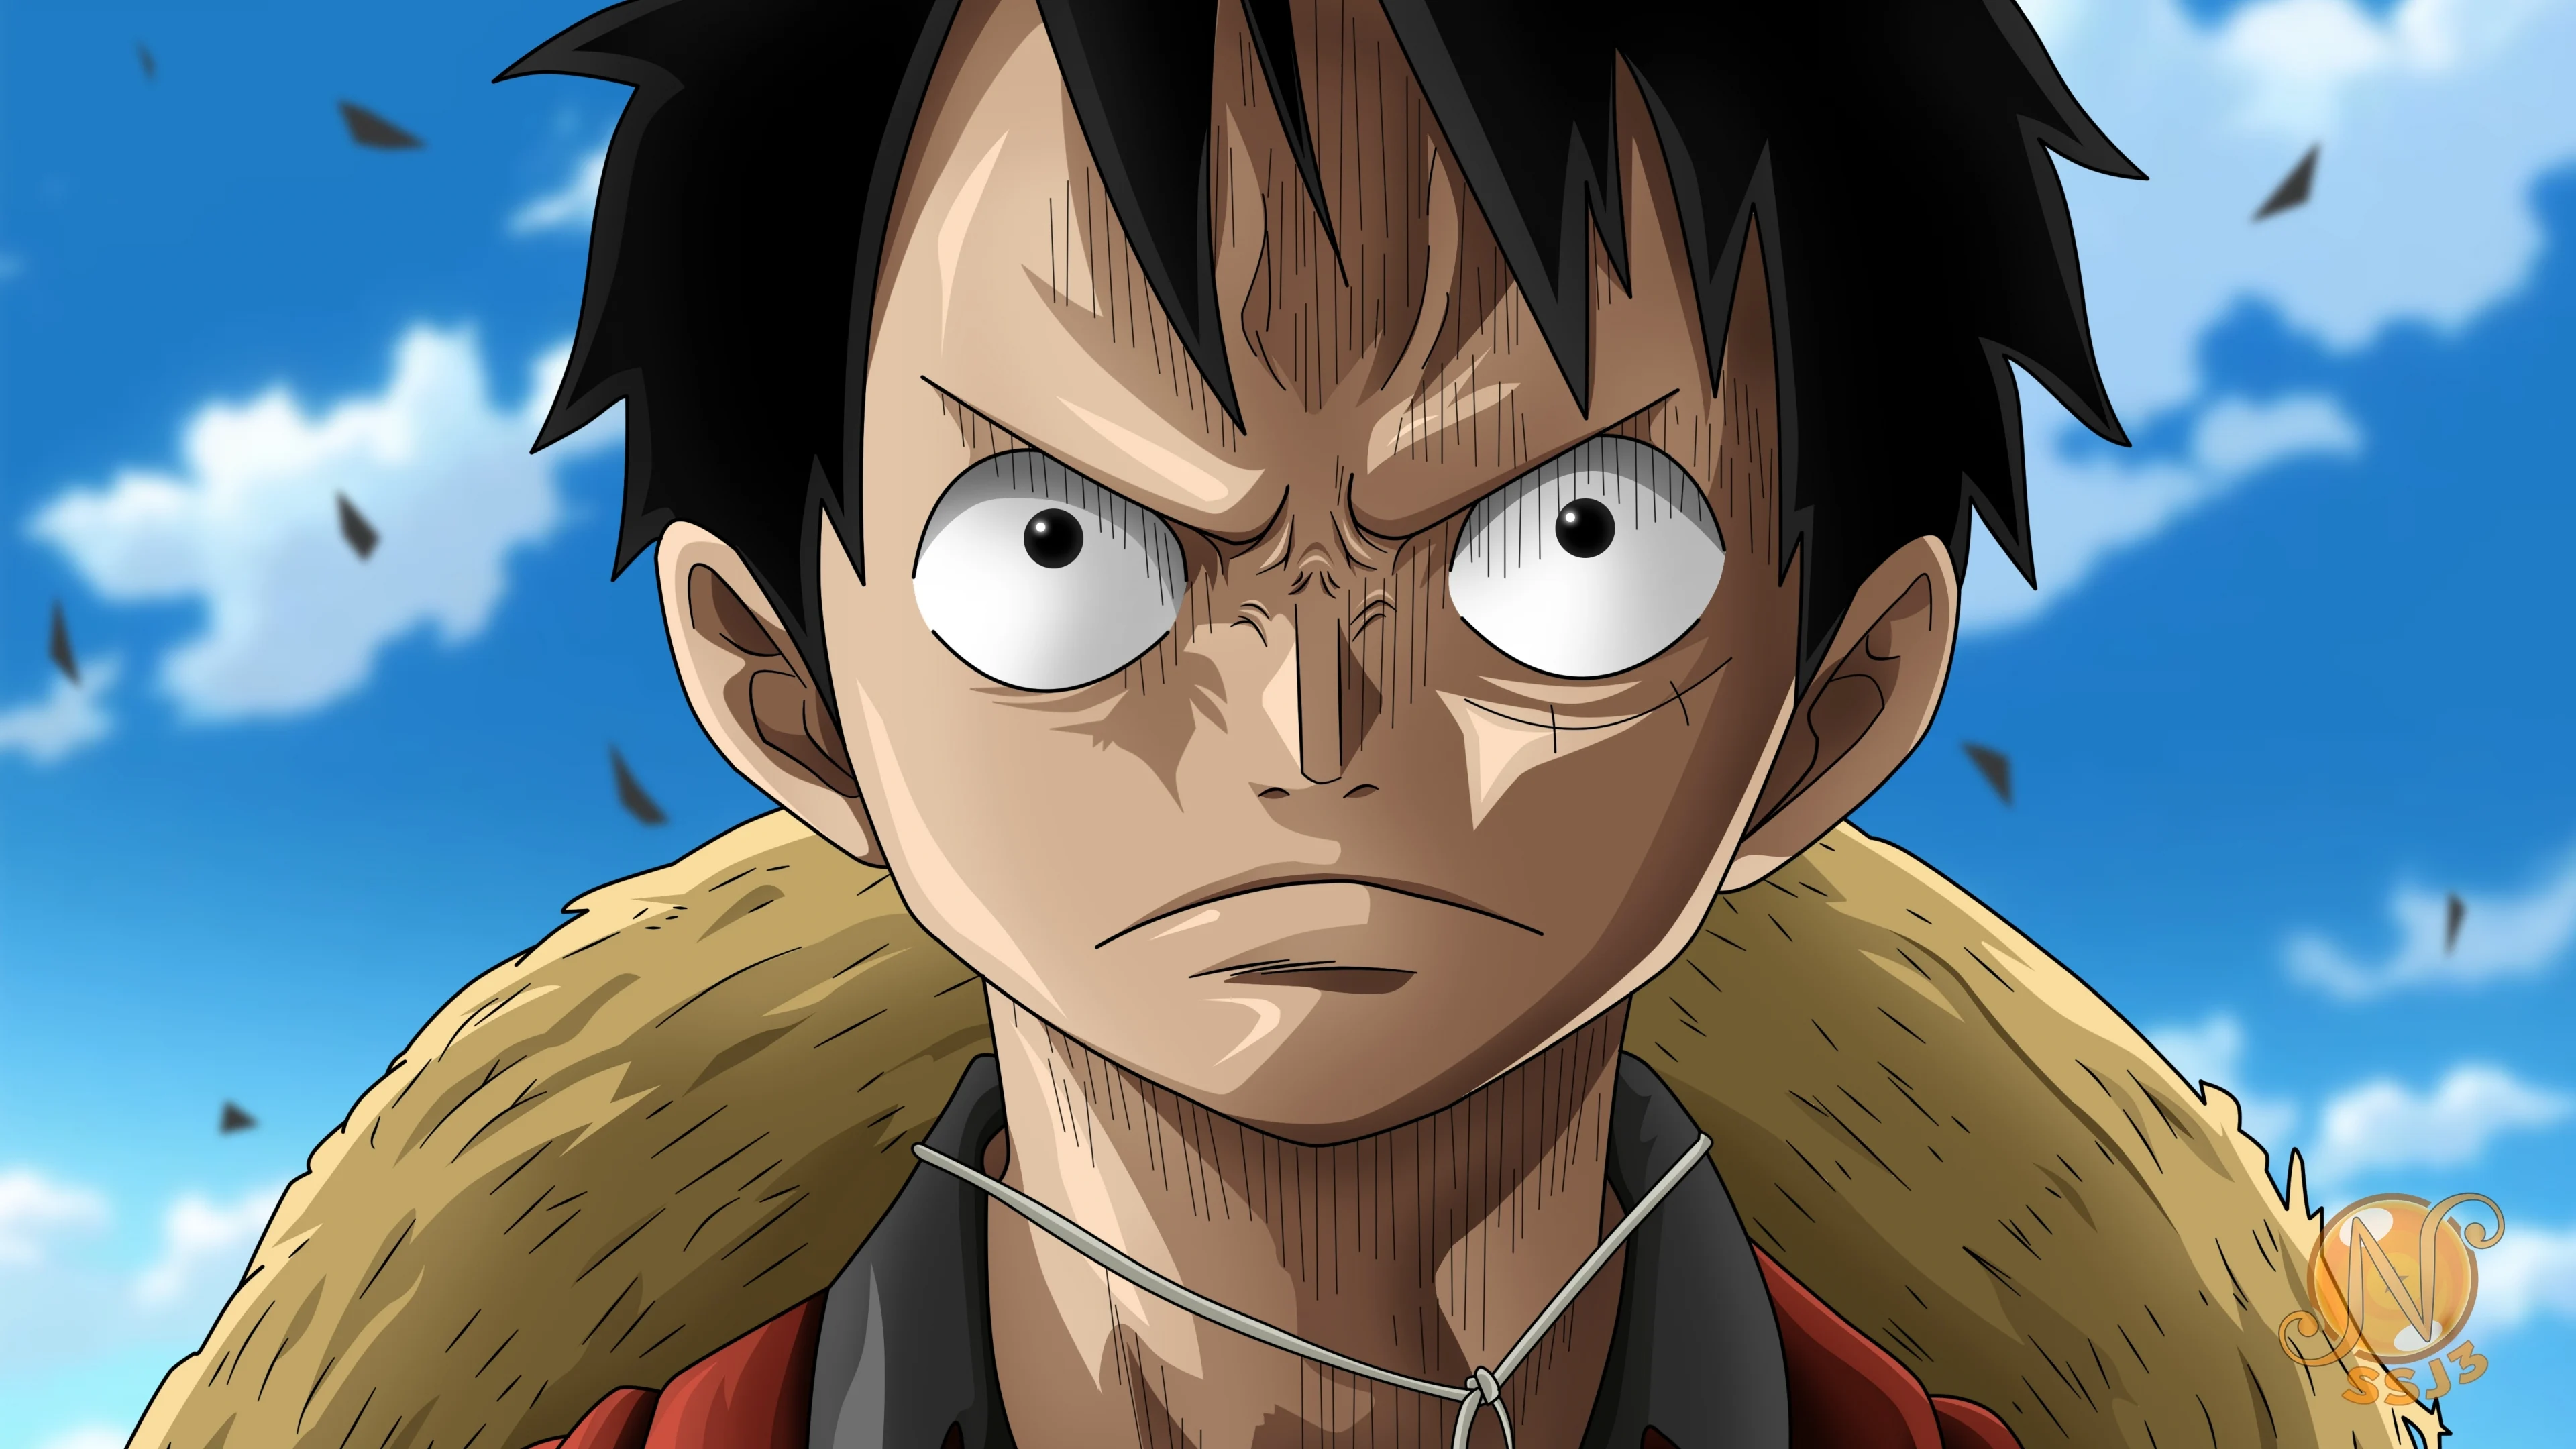

In [28]:
path = "/content/drive/MyDrive/monkeyDLuffy.jpg"  #creating an image path
img = Image.open(path) #gets the image
img

2. For the simplicity, convert the image into gray scale i.e. black and white.

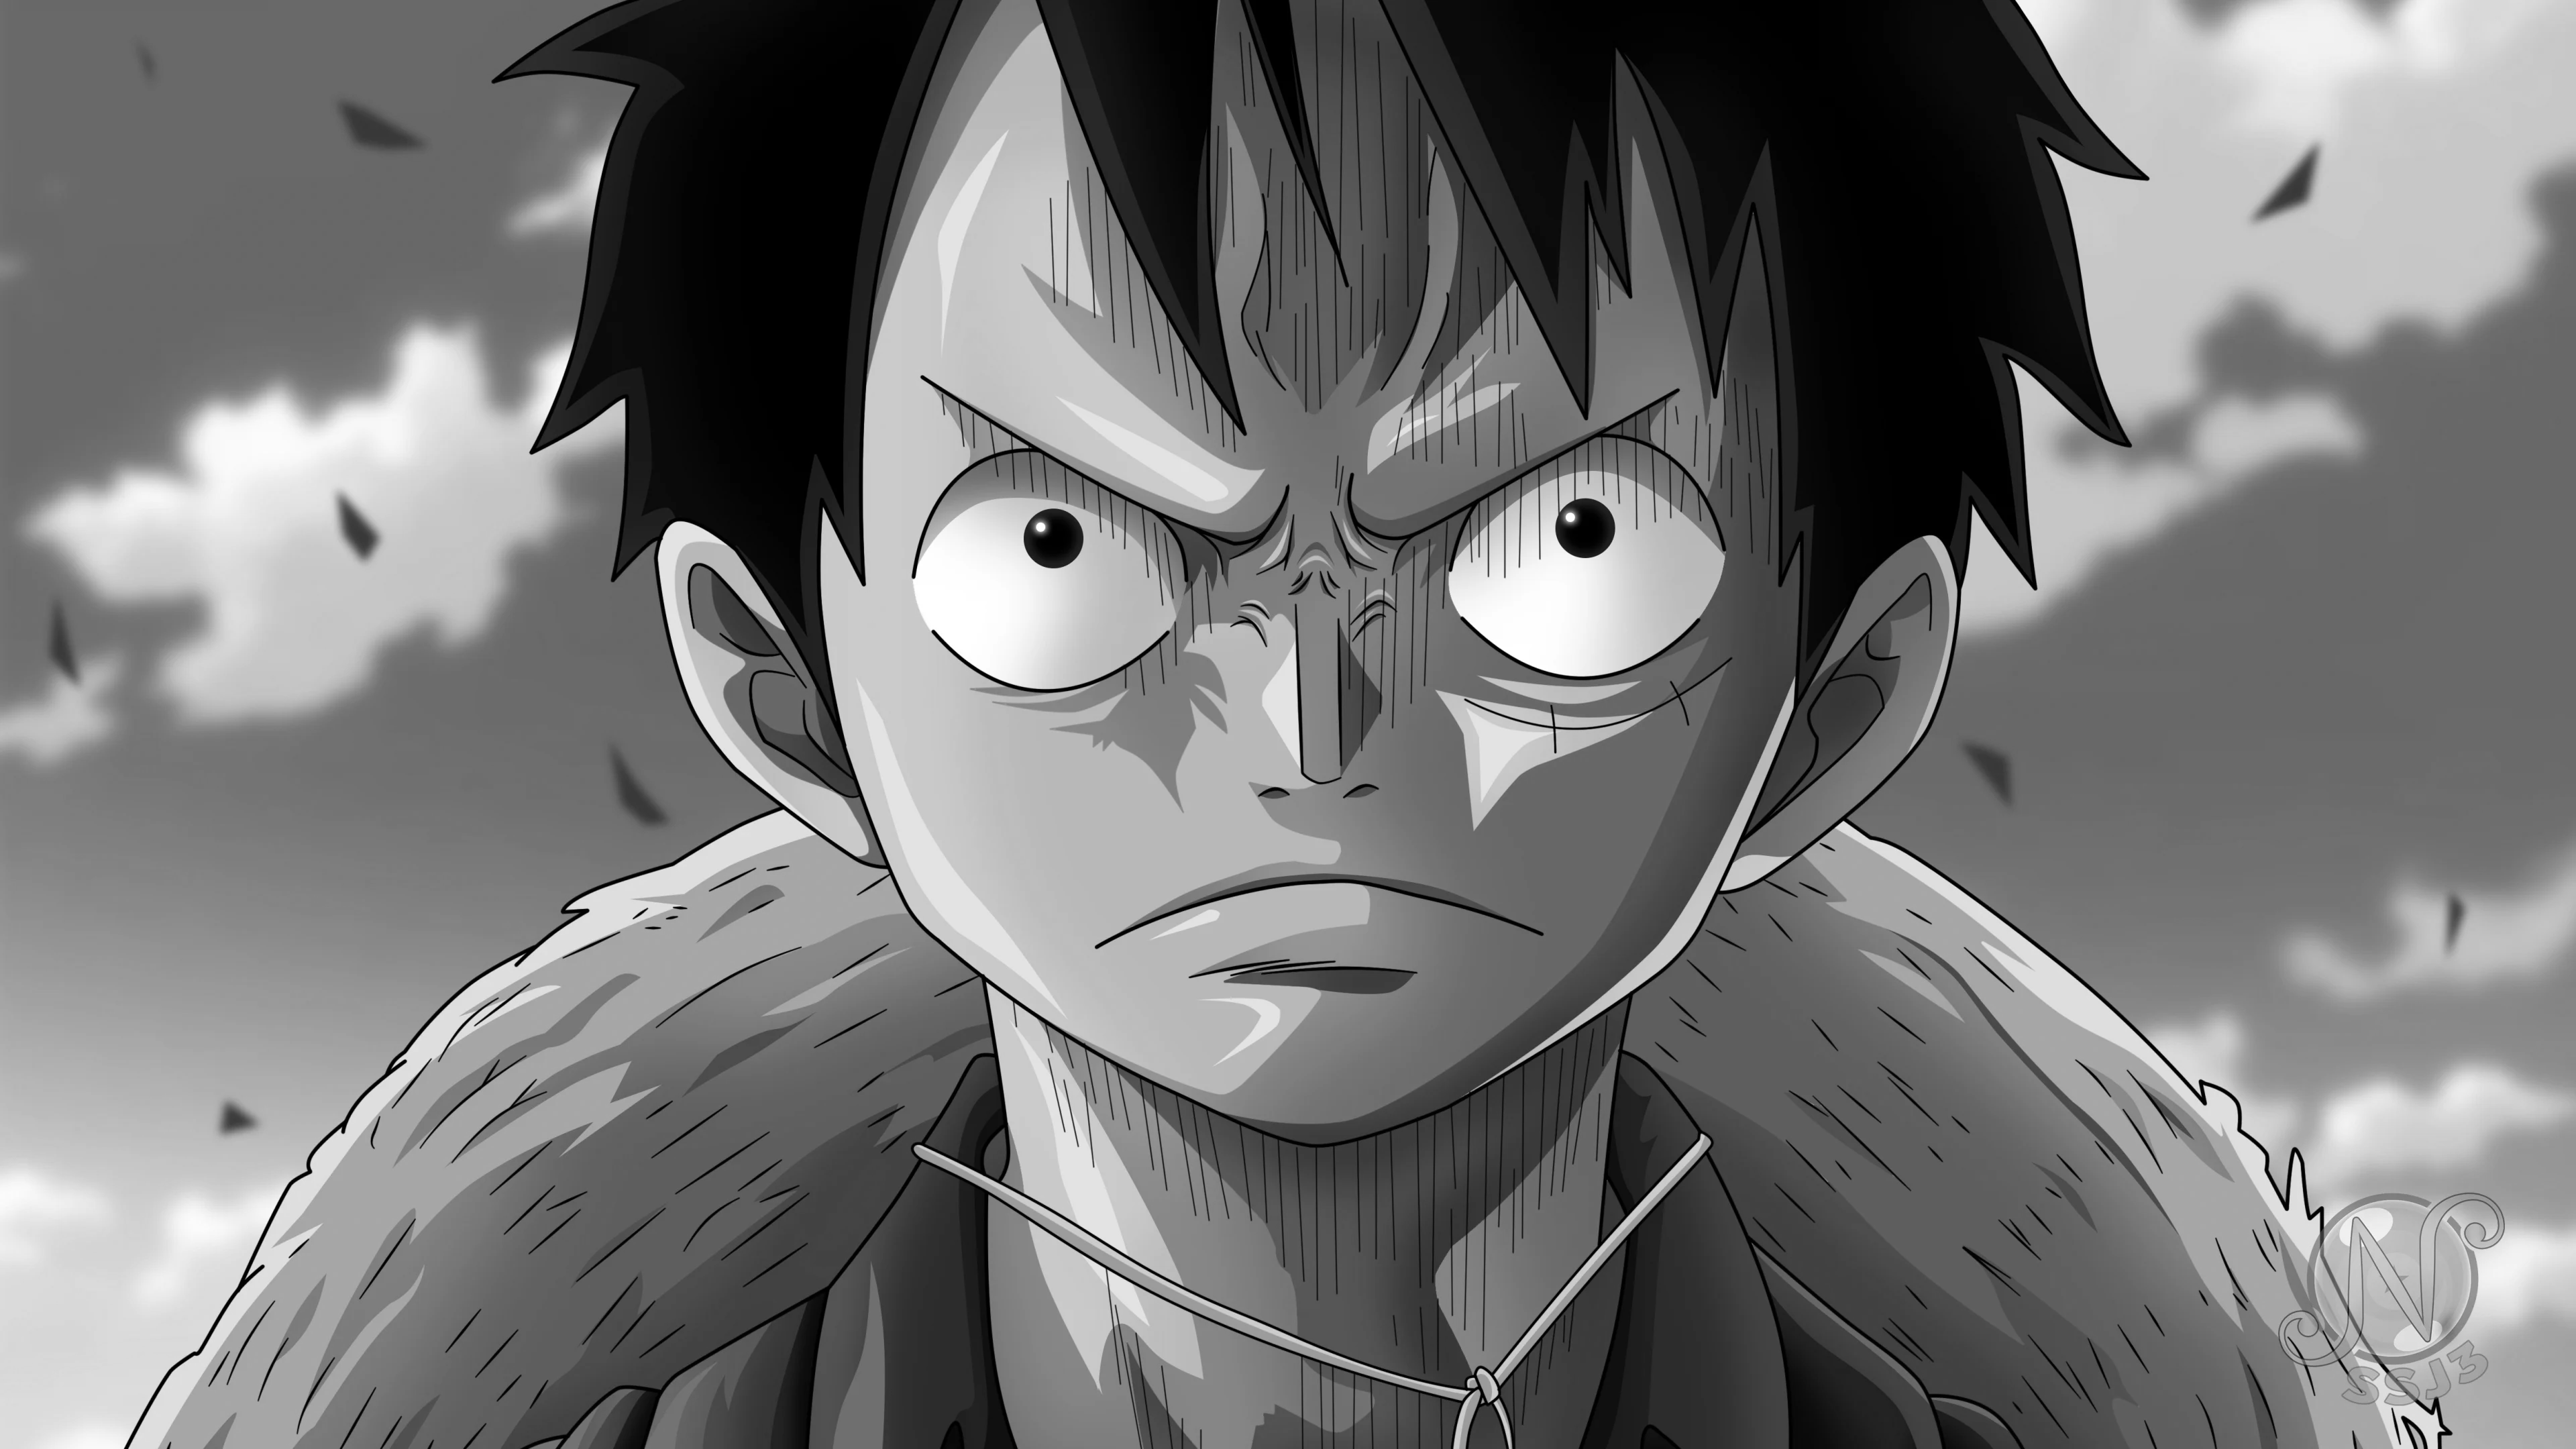

In [29]:
gImage = img.convert("L") #converting image into gray 
gImage

5.2 Standardize/Scale the data:[1]
To assure all the initial variables are transformed to same scale, it is a most to perform scaling operation before
any PCA operation. For the same purpose, we will perform standardization of data, which satisfies the following
expression:

In [30]:
iArr = np.array(gImage)  #creating NumPy array from the list gImage
mean = iArr.mean() # The mean and standard deviation of the image are then calculated 
std = iArr.std()   #using the mean and std methods of the NumPy array.
stdArr = (iArr -mean)/std #subtracting the mean from each element and dividing by the standard deviation
stdArr

array([[-0.15160981, -0.15160981, -0.15160981, ...,  1.36558293,
         1.36558293,  1.36558293],
       [-0.15160981, -0.15160981, -0.15160981, ...,  1.36558293,
         1.36558293,  1.36558293],
       [-0.15160981, -0.15160981, -0.15160981, ...,  1.36558293,
         1.36558293,  1.36558293],
       ...,
       [ 1.59780631,  1.59780631,  1.59780631, ...,  0.82372838,
         0.82372838,  0.82372838],
       [ 1.59780631,  1.59780631,  1.59780631, ...,  0.82372838,
         0.82372838,  0.82372838],
       [ 1.59780631,  1.59780631,  1.59780631, ...,  0.82372838,
         0.82372838,  0.82372838]])

5.3 Calculate Covariance Matrix:[1]
Each element of the covariance matrix represents covariance between each ijth element. The covariance between
two elements is calculated and stored in the matrix as shown in picture below:

In [31]:
cov_mat = np.cov(stdArr.T) # the covarience between two element is calculated and stored
cov_mat

array([[0.5065314 , 0.50666838, 0.50675512, ..., 0.1922725 , 0.19209259,
        0.1919758 ],
       [0.50666838, 0.50681166, 0.50689916, ..., 0.19221017, 0.19203033,
        0.19191356],
       [0.50675512, 0.50689916, 0.50699218, ..., 0.19216756, 0.19198779,
        0.19187107],
       ...,
       [0.1922725 , 0.19221017, 0.19216756, ..., 0.32254285, 0.32225952,
        0.32216094],
       [0.19209259, 0.19203033, 0.19198779, ..., 0.32225952, 0.32201476,
        0.3219184 ],
       [0.1919758 , 0.19191356, 0.19187107, ..., 0.32216094, 0.3219184 ,
        0.32182764]])

5.4 Eigen Decomposition: [2]
Decompose a covariance matrix into eigen values and eigen vectors:
A(n*n)= PDPI

Where:
1. A(n*n): −Covariance Matrix.
2. P:- Eigen Vector of Covariance Matrix.
3. D:- Diagonal Matrix. Diagonal elements are Eigen Values.
4. PI
: −Inverse of Eigen Vector.

In [32]:
# calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

eigenvalues = eigenvalues.real      #the real attribute extracts real part of the eigenvalues and eigenvectors
eigenvectors = eigenvectors.real

print("Eigen values :",eigenvalues)   #The eigenvalues and eigenvectors are printed to the console.
print("Eigen vectors :",eigenvectors)

Eigen values : [9.60724432e+02 4.27202317e+02 2.56156094e+02 ... 2.14199539e-15
 2.14199539e-15 1.52683832e-15]
Eigen vectors : [[ 3.05626734e-03 -2.89883568e-02 -1.30602990e-02 ... -7.47860747e-03
  -7.47860747e-03 -6.04049486e-03]
 [ 3.06389353e-03 -2.89893502e-02 -1.30541926e-02 ... -3.10842246e-04
  -3.10842246e-04 -1.19070231e-03]
 [ 3.06837649e-03 -2.89909337e-02 -1.30510325e-02 ... -1.51405685e-07
  -1.51405685e-07  1.56024995e-04]
 ...
 [-7.53181293e-03 -1.99395271e-02  2.09507285e-04 ... -2.92580380e-02
  -2.92580380e-02  2.65288731e-02]
 [-7.53918073e-03 -1.99112739e-02  1.87957606e-04 ...  2.57405471e-02
   2.57405471e-02  9.02362802e-03]
 [-7.54059654e-03 -1.98975805e-02  1.83474667e-04 ...  1.75808940e-02
   1.75808940e-02 -2.76463456e-02]]


5.5 Identify Principal Components:[2]

Determine the explained variance by each principal components, based on this we can determine how
many principal components to pick from.
• Experiment with Principal Components:
– Pick three different combination of principal components with various explained variance
value and compare the result.

In [34]:
tot = sum(eigenvalues)   #total sum of eigen values is calculated 
var_exp = [(i / tot)*100 for i in sorted(eigenvalues, reverse=True)]  #the percentage of total variance is stored in var_exp
cum_var_exp = np.cumsum(var_exp)    #The cumulative sum of the variance explained by each eigenvalue  which is stored in the variable cum_var_exp
tot     # printing the total sum of the eigenvalues.

2688.2792433315026

In [35]:
import matplotlib.pyplot as plt

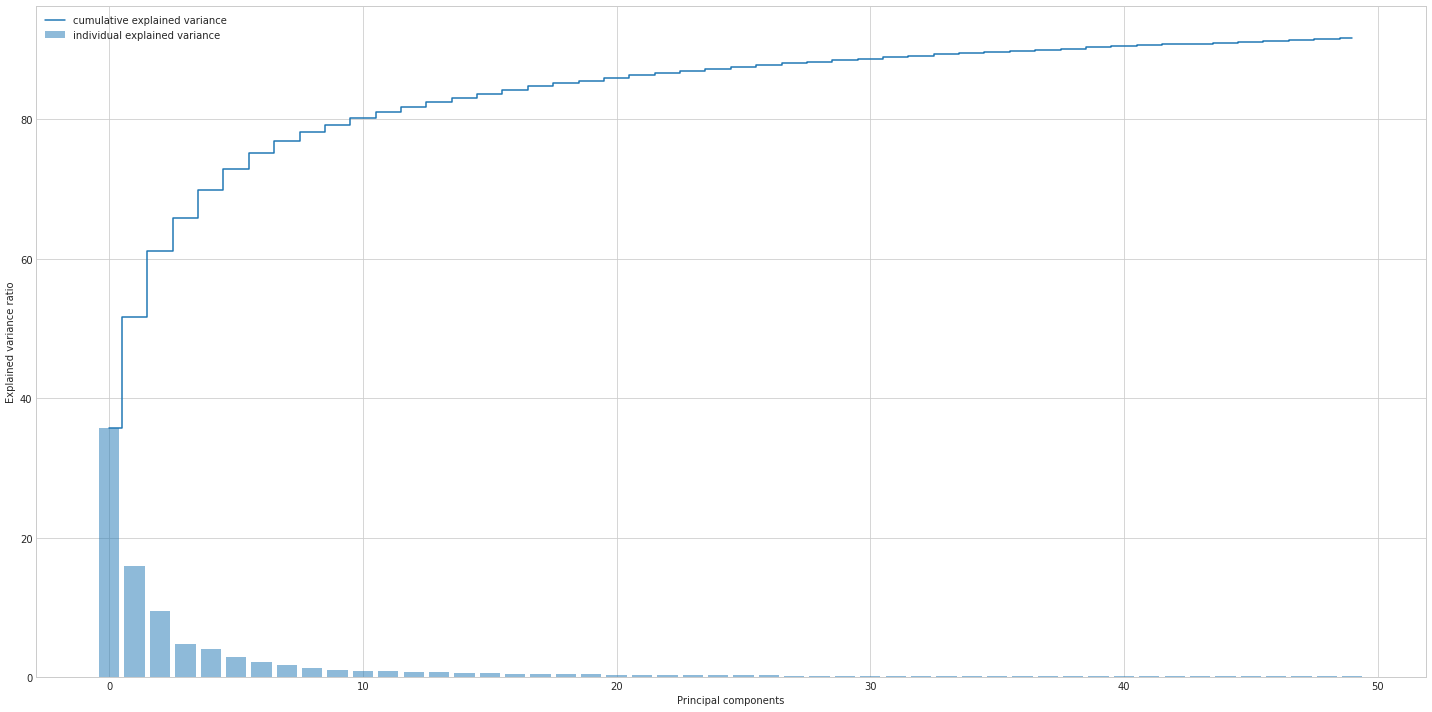

In [36]:
with plt.style.context('seaborn-whitegrid'): 
    plt.figure(figsize=(20, 10))
    plt.bar(range(50), var_exp[:50], alpha=0.5, align='center', #The bar function is used to plot the individual explained variance for each principal component as a bar chart.
            label='individual explained variance')
    plt.step(range(50), cum_var_exp[:50], where='mid', #The step function is used to plot the cumulative explained variance as a step chart.
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()     # The tight_layout function is used to ensure that the plot fits within the figure boundaries.
    plt.savefig('pca2.pdf') #the plot is saved to a file called pca2.pdf

5.6 Reconstruction of the image: [3]

Reconstruct the image based on number of principal components you picked in step 

4.5.
Reconstruct all three images and conclude the result based on your observation. Display the reconstructed
image, experiment with various number of components.

In [26]:
import matplotlib.pyplot as plt

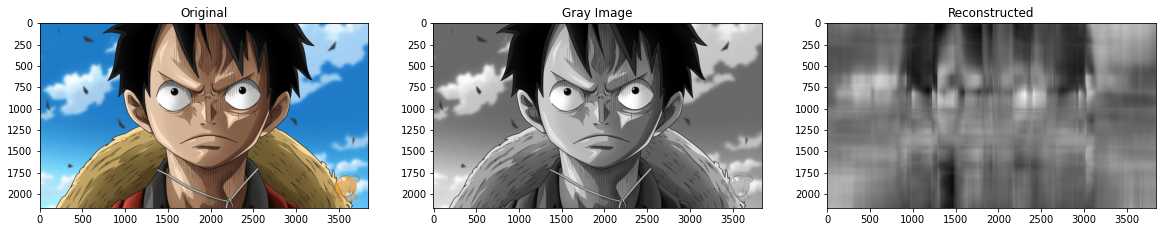

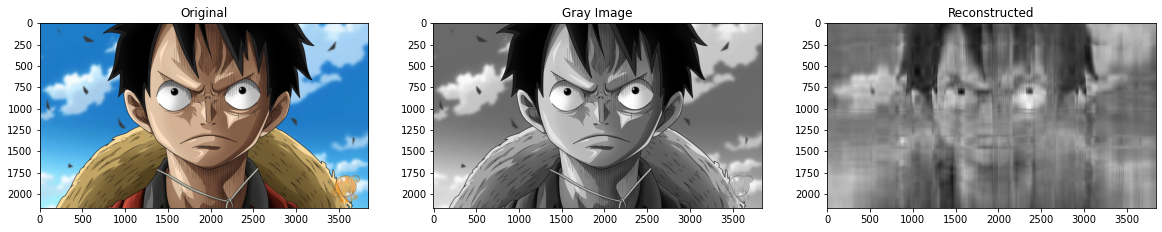

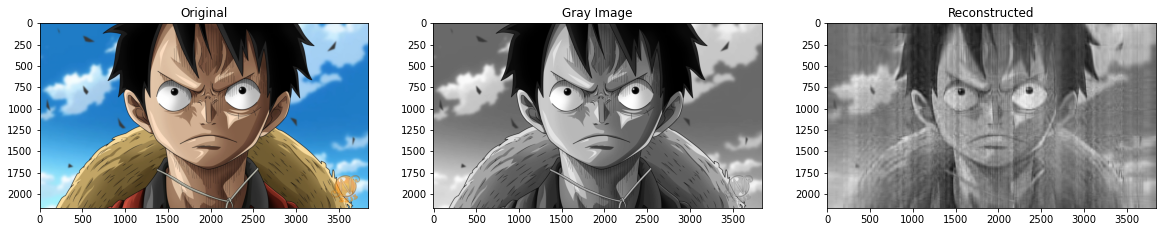

In [37]:
#the principle components are 5, 10 , 30
for n in [5,10,30]:
  eigen_vector = eigenvectors[:,:n]
  image_data = np.dot(stdArr, eigen_vector)

  # reconstruct the image using the inverse_transform method
  image_reconstructed = np.dot(image_data, eigen_vector.T)

  # plot the original and reconstructed images
  fig, axs = plt.subplots(1, 3, figsize=(20, 10))
  axs[0].imshow(img)
  axs[0].set_title('Original')
  axs[1].imshow(gImage, cmap='gray')
  axs[1].set_title('Gray Image')
  axs[2].imshow(image_reconstructed, cmap='gray')
  axs[2].set_title('Reconstructed')
  plt.show()